No of images in training set: 835
No of images in validation set: 104
No of images in test set: 105
No of images in feeder set: 15079
Labels: ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
Labels (feeder): ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']


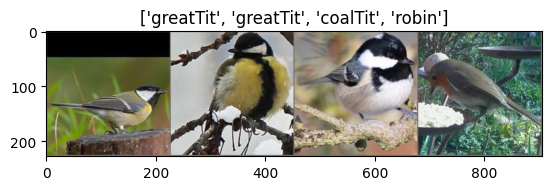

In [1]:
# not strictly necessary, but imported anyway for the IDE haha
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

%run setup.ipynb 

# Change model setup 

Change learning rate and add weight decay 

In [2]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation = transforms.Compose([
    transforms.ColorJitter(brightness=0.1),
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)),   
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation)
dataloader_train_aug = torch.utils.data.DataLoader(dataset_train_aug, batch_size=8, shuffle=True, num_workers=4)

In [3]:
# Set and load model
untrained_model_aug = load_and_prep_resnet50()
optimizer = torch.optim.SGD(untrained_model_aug.parameters(), lr=0.02, momentum=0.9, weight_decay=0.00001)

In [4]:
freezetrained_model_aug, _ = train_model(model=untrained_model_aug, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug) 

Epoch 1/24
----------
Train Loss: 1.3894 Acc: 0.4898
Val Loss: 1.1499 Acc: 0.5865
Epoch time 1m 10s
----------

Epoch 2/24
----------
Train Loss: 0.7828 Acc: 0.7425
Val Loss: 1.0028 Acc: 0.6058
Epoch time 1m 10s
----------

Epoch 3/24
----------
Train Loss: 0.6706 Acc: 0.7868
Val Loss: 0.9805 Acc: 0.6827
Epoch time 1m 11s
----------

Epoch 4/24
----------
Train Loss: 0.5789 Acc: 0.7964
Val Loss: 0.8940 Acc: 0.6442
Epoch time 1m 11s
----------

Epoch 5/24
----------
Train Loss: 0.5278 Acc: 0.8275
Val Loss: 0.8553 Acc: 0.6538
Epoch time 1m 11s
----------

Epoch 6/24
----------
Train Loss: 0.5149 Acc: 0.8192
Val Loss: 0.8544 Acc: 0.7115
Epoch time 1m 11s
----------

Epoch 7/24
----------
Train Loss: 0.4961 Acc: 0.8383
Val Loss: 0.8200 Acc: 0.7404
Epoch time 1m 11s
----------

Epoch 8/24
----------
Train Loss: 0.5186 Acc: 0.8251
Val Loss: 0.7493 Acc: 0.7788
Epoch time 1m 11s
----------

Epoch 9/24
----------
Train Loss: 0.4216 Acc: 0.8467
Val Loss: 0.7542 Acc: 0.7212
Epoch time 1m 19s
----

In [5]:
unfreeze_layers(freezetrained_model_aug)
model_aug, model_aug_info = train_model(model=freezetrained_model_aug, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug)

Epoch 1/24
----------
Train Loss: 1.9352 Acc: 0.2910
Val Loss: 2.8258 Acc: 0.2115
Epoch time 17m 8s
----------

Epoch 2/24
----------
Train Loss: 1.7932 Acc: 0.3545
Val Loss: 3.7339 Acc: 0.2981
Epoch time 4m 17s
----------

Epoch 3/24
----------
Train Loss: 1.4646 Acc: 0.4551
Val Loss: 3.6935 Acc: 0.3077
Epoch time 1m 54s
----------

Epoch 4/24
----------
Train Loss: 1.1751 Acc: 0.6000
Val Loss: 1.0513 Acc: 0.6538
Epoch time 1m 53s
----------

Epoch 5/24
----------
Train Loss: 1.0472 Acc: 0.6371
Val Loss: 1.5939 Acc: 0.5865
Epoch time 1m 53s
----------

Epoch 6/24
----------
Train Loss: 0.9921 Acc: 0.6479
Val Loss: 1.0462 Acc: 0.7212
Epoch time 1m 53s
----------

Epoch 7/24
----------
Train Loss: 0.8357 Acc: 0.7090
Val Loss: 1.3827 Acc: 0.6346
Epoch time 1m 53s
----------

Epoch 8/24
----------
Train Loss: 0.7775 Acc: 0.7198
Val Loss: 2.4005 Acc: 0.4808
Epoch time 2m 22s
----------

Epoch 9/24
----------
Train Loss: 0.7352 Acc: 0.7521
Val Loss: 2.7222 Acc: 0.5385
Epoch time 17m 54s
---

## Results

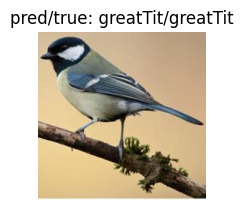

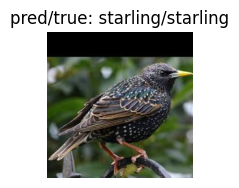

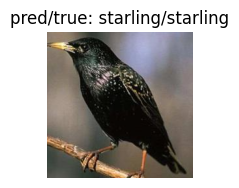

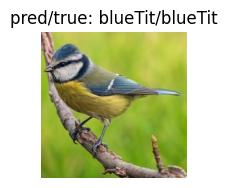

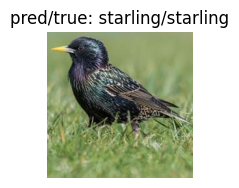

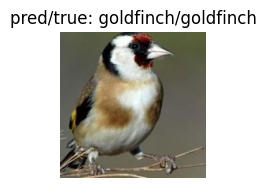

In [6]:
visualize_model(model_aug, dataloader_tiny_val, class_labels, device)

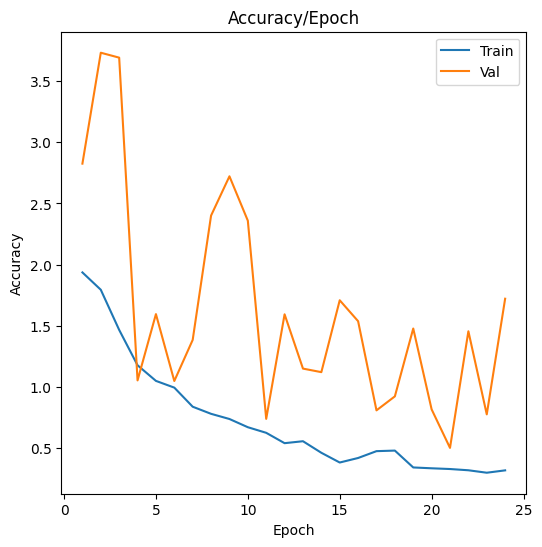

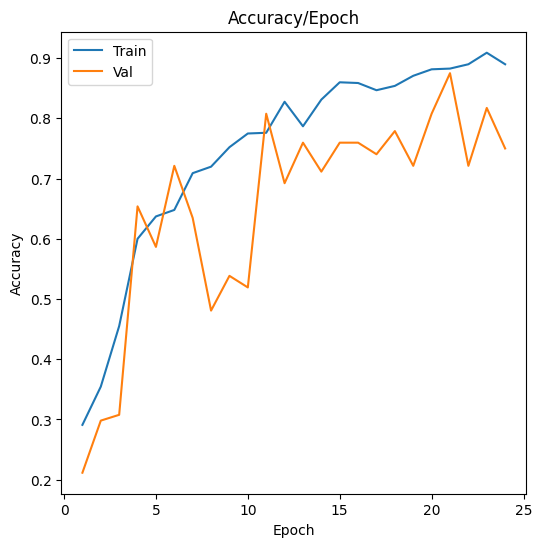

In [7]:
plot_accuracies(model_aug_info["train_loss"], model_aug_info["val_loss"], ["Train", "Val"])
plot_accuracies(model_aug_info["train_acc"], model_aug_info["val_acc"], ["Train", "Val"])

[[15  0  0  0  0  0  0]
 [ 0 14  0  1  0  0  0]
 [ 1  2  9  0  2  0  1]
 [ 0  0  0 14  0  1  0]
 [ 0  0  0  0 14  0  1]
 [ 0  0  0  0  0 13  2]
 [ 0  0  0  1  0  0 14]]
Accuracy 88.57142857142857


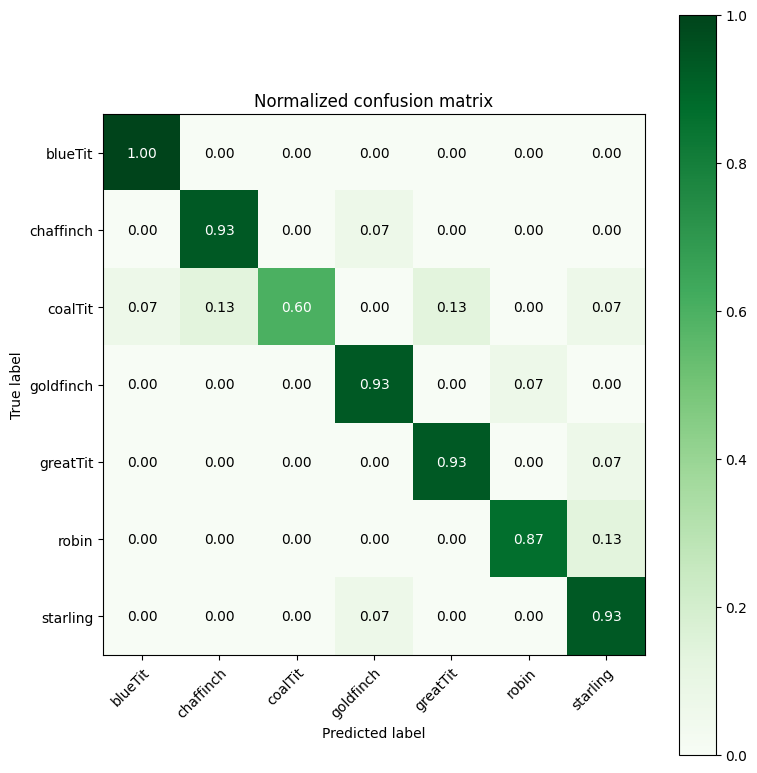

In [8]:
truel, predl = makeAll(dataloader_test, model_aug, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [9]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       0.94      1.00      0.97        15
   chaffinch       0.88      0.93      0.90        15
     coalTit       1.00      0.60      0.75        15
   goldfinch       0.88      0.93      0.90        15
    greatTit       0.88      0.93      0.90        15
       robin       0.93      0.87      0.90        15
    starling       0.78      0.93      0.85        15

    accuracy                           0.89       105
   macro avg       0.90      0.89      0.88       105
weighted avg       0.90      0.89      0.88       105



# Change unfreeze

Instead of unfreeze all we only unfreeze layer 4

In [10]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation = transforms.Compose([
    transforms.ColorJitter(brightness=0.1),
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)),
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation)
dataloader_train_aug = torch.utils.data.DataLoader(dataset_train_aug, batch_size=8, shuffle=True, num_workers=4)

In [11]:
# Set and load model
untrained_model_aug = load_and_prep_resnet50()
optimizer = torch.optim.SGD(untrained_model_aug.parameters(), lr=0.02, momentum=0.9, weight_decay=0.00001)

In [12]:
freezetrained_model_aug, _ = train_model(model=untrained_model_aug, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug) 

Epoch 1/24
----------
Train Loss: 1.3091 Acc: 0.5138
Val Loss: 1.1801 Acc: 0.6058
Epoch time 6m 56s
----------

Epoch 2/24
----------
Train Loss: 0.8275 Acc: 0.7150
Val Loss: 0.9680 Acc: 0.6442
Epoch time 16m 24s
----------

Epoch 3/24
----------
Train Loss: 0.6113 Acc: 0.7832
Val Loss: 1.0369 Acc: 0.5769
Epoch time 1m 9s
----------

Epoch 4/24
----------
Train Loss: 0.6447 Acc: 0.7749
Val Loss: 0.8326 Acc: 0.6635
Epoch time 15m 52s
----------

Epoch 5/24
----------
Train Loss: 0.6353 Acc: 0.7880
Val Loss: 0.9109 Acc: 0.6538
Epoch time 1m 9s
----------

Epoch 6/24
----------
Train Loss: 0.5755 Acc: 0.8060
Val Loss: 0.7123 Acc: 0.7308
Epoch time 14m 8s
----------

Epoch 7/24
----------
Train Loss: 0.5366 Acc: 0.8120
Val Loss: 0.7944 Acc: 0.7308
Epoch time 1m 9s
----------

Epoch 8/24
----------
Train Loss: 0.4996 Acc: 0.8359
Val Loss: 0.7111 Acc: 0.7404
Epoch time 2m 8s
----------

Epoch 9/24
----------
Train Loss: 0.4743 Acc: 0.8395
Val Loss: 0.6811 Acc: 0.7404
Epoch time 1m 13s
------

In [13]:
unfreeze_layer4(freezetrained_model_aug)
model_aug, model_aug_info = train_model(model=freezetrained_model_aug, optimizer=optimizer, num_epoch=24, train=dataloader_train_aug)

Epoch 1/24
----------
Train Loss: 0.3724 Acc: 0.8635
Val Loss: 0.5956 Acc: 0.7788
Epoch time 1m 11s
----------

Epoch 2/24
----------
Train Loss: 0.3682 Acc: 0.8874
Val Loss: 0.7183 Acc: 0.7404
Epoch time 1m 10s
----------

Epoch 3/24
----------
Train Loss: 0.3284 Acc: 0.8874
Val Loss: 0.6992 Acc: 0.7115
Epoch time 1m 10s
----------

Epoch 4/24
----------
Train Loss: 0.3509 Acc: 0.8802
Val Loss: 1.0447 Acc: 0.6827
Epoch time 1m 11s
----------

Epoch 5/24
----------
Train Loss: 0.3937 Acc: 0.8659
Val Loss: 0.8288 Acc: 0.7019
Epoch time 1m 10s
----------

Epoch 6/24
----------
Train Loss: 0.3887 Acc: 0.8671
Val Loss: 1.0013 Acc: 0.6923
Epoch time 1m 10s
----------

Epoch 7/24
----------
Train Loss: 0.3602 Acc: 0.8743
Val Loss: 0.7852 Acc: 0.7019
Epoch time 1m 11s
----------

Epoch 8/24
----------
Train Loss: 0.3919 Acc: 0.8587
Val Loss: 0.9886 Acc: 0.6731
Epoch time 1m 11s
----------

Epoch 9/24
----------
Train Loss: 0.3497 Acc: 0.8731
Val Loss: 0.8999 Acc: 0.7019
Epoch time 1m 10s
----

## Results

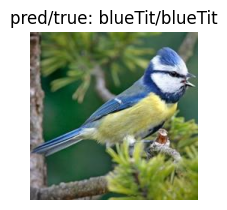

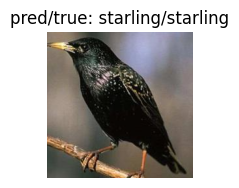

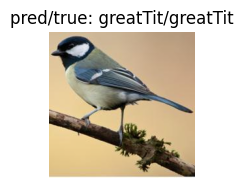

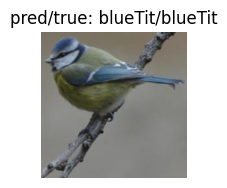

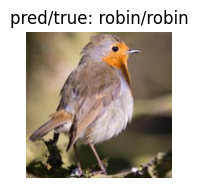

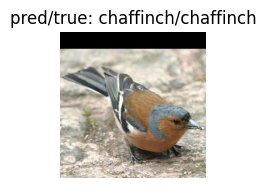

In [14]:
visualize_model(model_aug, dataloader_tiny_val, class_labels, device)

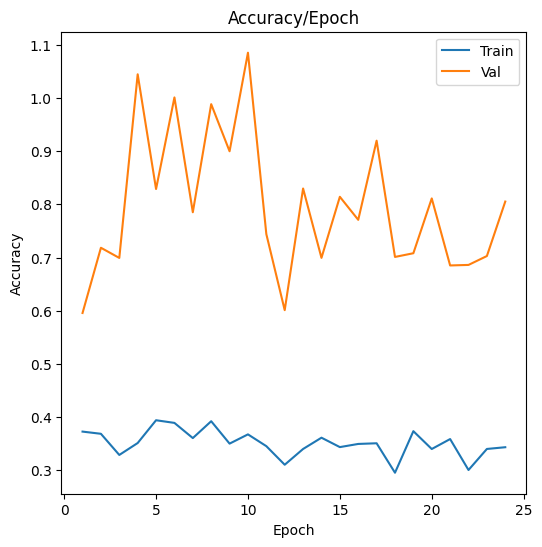

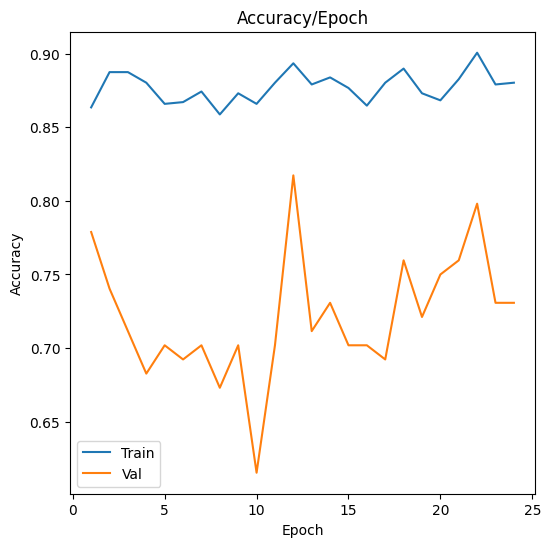

In [15]:
plot_accuracies(model_aug_info["train_loss"], model_aug_info["val_loss"], ["Train", "Val"])
plot_accuracies(model_aug_info["train_acc"], model_aug_info["val_acc"], ["Train", "Val"])

[[ 8  0  1  0  6  0  0]
 [ 0 10  0  1  1  3  0]
 [ 0  0  8  1  5  0  1]
 [ 0  0  1 11  1  1  1]
 [ 2  0  1  0 11  0  1]
 [ 0  2  0  0  0 13  0]
 [ 0  1  0  1  0  0 13]]
Accuracy 70.47619047619048


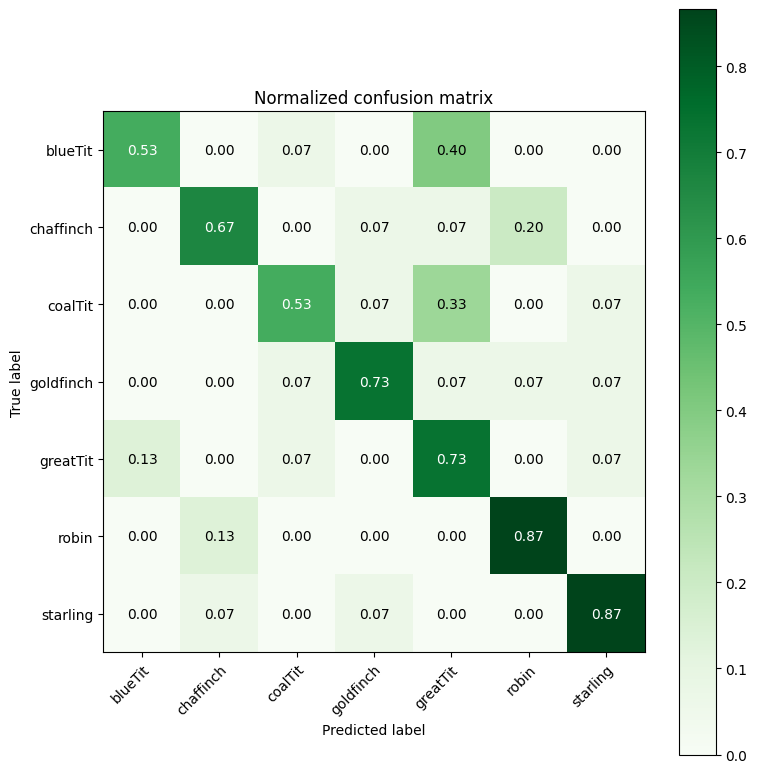

In [16]:
truel, predl = makeAll(dataloader_test, model_aug, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [17]:
class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
print(classification_report(truel, predl, target_names=class_labels))

              precision    recall  f1-score   support

     blueTit       0.80      0.53      0.64        15
   chaffinch       0.77      0.67      0.71        15
     coalTit       0.73      0.53      0.62        15
   goldfinch       0.79      0.73      0.76        15
    greatTit       0.46      0.73      0.56        15
       robin       0.76      0.87      0.81        15
    starling       0.81      0.87      0.84        15

    accuracy                           0.70       105
   macro avg       0.73      0.70      0.71       105
weighted avg       0.73      0.70      0.71       105

